In [1]:
import numpy as np
import pandas as pd
import seaborn as sns

import matplotlib.pyplot as plt

import warnings
warnings.filterwarnings('ignore')


In [2]:
iris_df = pd.read_csv(r"C:\Data\iris_modified.csv")

In [3]:
iris_df

,Unnamed: 0,sepal_length,sepal_width,petal_length,petal_width,species
0,0,5.1,3.5,1.4,0.2,setosa
1,1,4.9,3.0,1.4,0.2,setosa
2,2,4.7,3.2,1.3,0.2,setosa
3,3,4.6,3.1,1.5,0.2,setosa
4,4,5.0,3.6,1.4,0.2,setosa
...,...,...,...,...,...,...
95,95,5.7,3.0,4.2,1.2,versicolor
96,96,5.7,2.9,4.2,1.3,versicolor
97,97,6.2,2.9,4.3,1.3,versicolor
98,98,5.1,2.5,3.0,1.1,versicolor


In [4]:
iris_df.species.unique()

array(['setosa', 'versicolor'], dtype=object)

In [5]:
iris_df.describe().T

,count,mean,std,min,25%,50%,75%,max
Unnamed: 0,100.0,49.500,29.011492,0.0,24.75,49.50,74.250,99.0
sepal_length,100.0,5.471,0.641698,4.3,5.00,5.40,5.900,7.0
sepal_width,100.0,3.099,0.478739,2.0,2.80,3.05,3.400,4.4
petal_length,100.0,2.861,1.449549,1.0,1.50,2.45,4.325,5.1
petal_width,100.0,0.786,0.565153,0.1,0.20,0.80,1.300,1.8


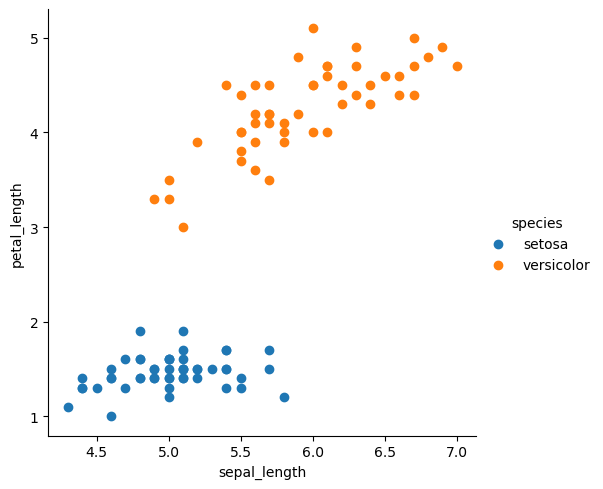

In [6]:
sns.FacetGrid(iris_df, hue ="species",
              height = 5).map(plt.scatter,
                              'sepal_length',
                              'petal_length').add_legend()

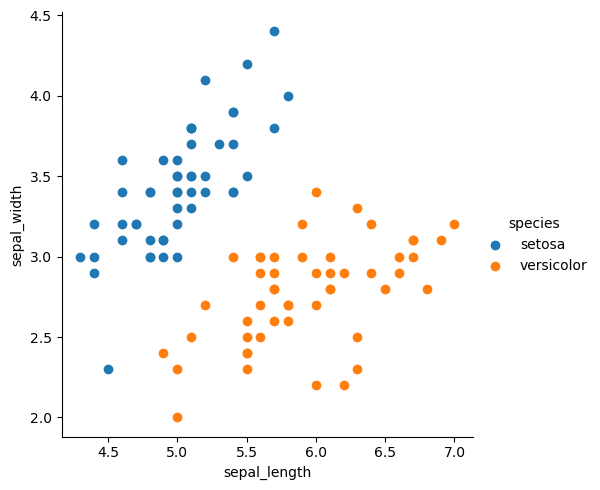

In [7]:
sns.FacetGrid(iris_df, hue ="species",
              height = 5).map(plt.scatter,
                              'sepal_length',
                              'sepal_width').add_legend()



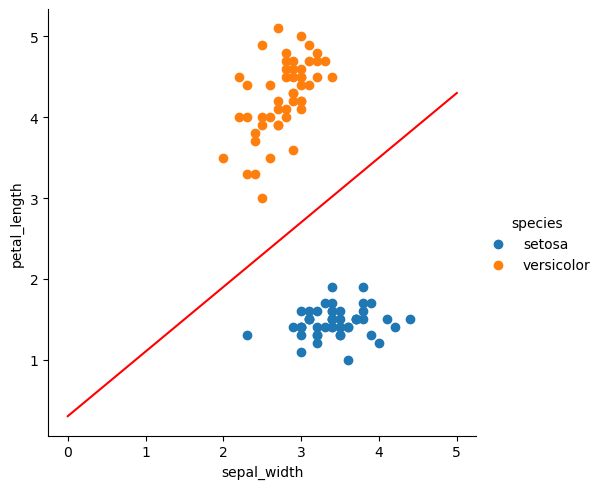

In [8]:
sns.FacetGrid(iris_df, hue ="species",
              height = 5).map(plt.scatter,
                              'sepal_width',
                              'petal_length').add_legend()
# Define the points for the line
x_line = np.array([0, 5])
y_line = 0.8 * x_line + 0.3 # Example line equation

# Plot the line over the scatter plot
plt.plot(x_line, y_line, color='r')

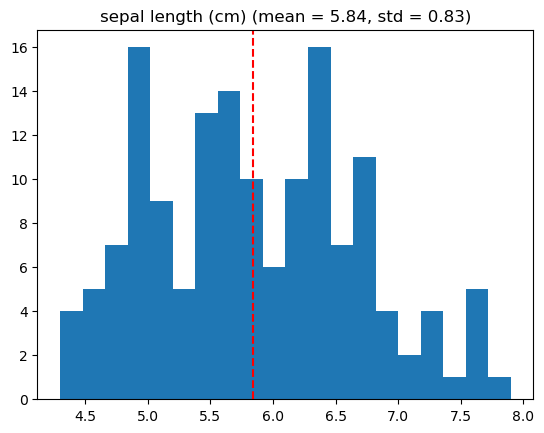

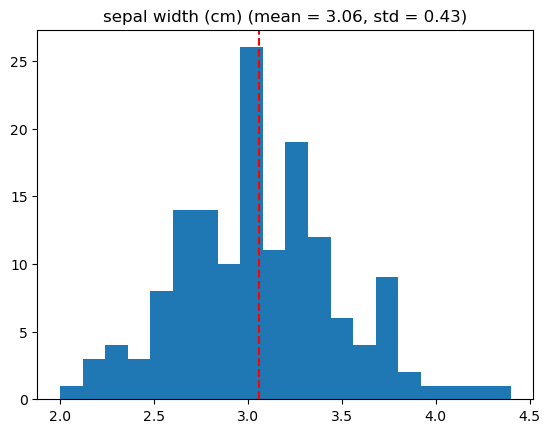

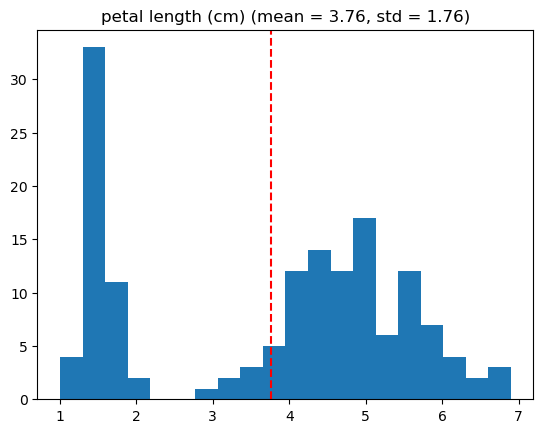

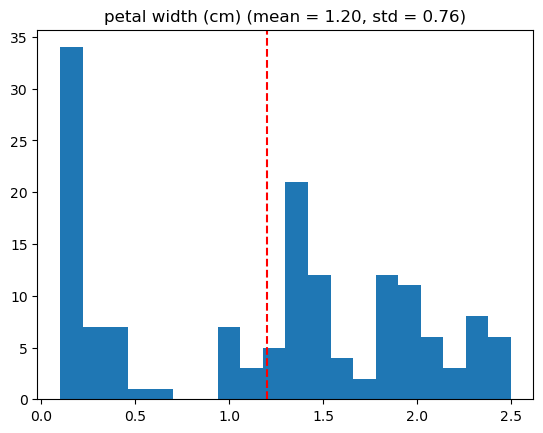

In [125]:
from sklearn.datasets import load_iris
import matplotlib.pyplot as plt

# Load the Iris dataset
iris = load_iris()

# Extract the features and target variable
X = iris.data
y = iris.target

# Calculate the mean and standard deviation of each feature
means = X.mean(axis=0)
stds = X.std(axis=0)

# Plot histograms of each feature
for i in range(X.shape[1]):
    plt.hist(X[:, i], bins=20)
    plt.axvline(x=means[i], color='r', linestyle='--')
    plt.title(iris.feature_names[i] + ' (mean = {:.2f}, std = {:.2f})'.format(means[i], stds[i]))
    plt.show()


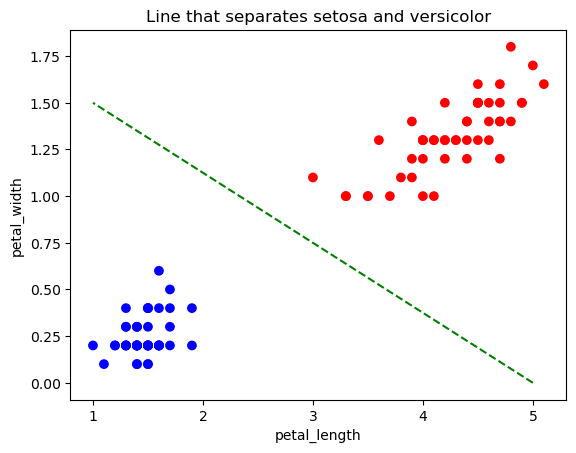

In [10]:
# select only the data points for the first two classes
class_1 = iris_df.loc[iris_df['species'].isin(['setosa', 'versicolor'])]

# setosa will be represented by blue and versicolor by red
colors = {'setosa':'blue', 'versicolor':'red'}

# plot the data points using a scatter plot
plt.scatter(class_1['petal_length'], class_1['petal_width'], c=class_1['species'].apply(lambda x: colors[x]))

# plot the line that best separates the two classes
plt.plot([5,1], [0,1.5], linestyle='--', color='green')

# set the labels for the x and y axes
plt.xlabel('petal_length')
plt.ylabel('petal_width')

# set the title of the plot
plt.title('Line that separates setosa and versicolor')

# show the plot
plt.show()

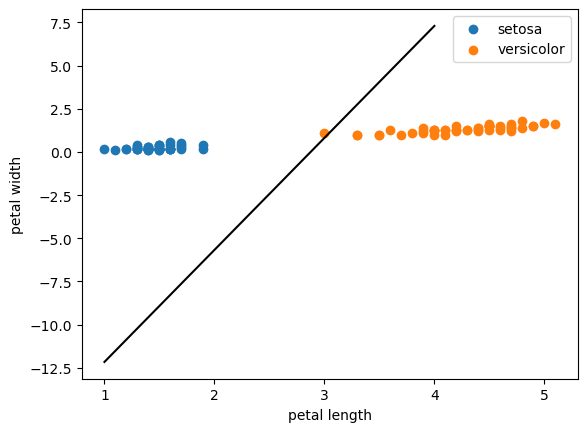

Weights: petal_length   -0.367285
petal_width     0.075491
Name: 0, dtype: object
Bias: [0.91797538]


In [12]:
import numpy as np

# define the perceptron function
def perceptron(x, w, b):
    y = np.dot(x, w) + b
    return 1 if y > 0 else 0

# define the update function
def update(x, w, b, y, eta):
    error = y - perceptron(x, w, b)
    w += eta * error * x
    b += eta * error
    return w, b

# initialize the weights and bias
w = np.random.rand(2)
b = np.random.rand(1)

# set the learning rate
eta = 0.1

# train the perceptron
for i in range(120):
    for j in range(len(iris_df)):
        x = iris_df.iloc[j][['petal_length', 'petal_width']]
        if iris_df.iloc[j]['species'] == 'setosa':
            y = 1
        else:
            y = 0
        w, b = update(x, w, b, y, eta)
        
# separate the data by species
setosa = iris_df[iris_df['species'] == 'setosa']
versicolor = iris_df[iris_df['species'] == 'versicolor']       

# plot the data points as a scatter plot
plt.scatter(setosa['petal_length'], setosa['petal_width'], label='setosa')
plt.scatter(versicolor['petal_length'], versicolor['petal_width'], label='versicolor')

# draw the separator line
x = [1, 4]
y = [-b/w[1], (-b-w[0]*4)/w[1]]
plt.plot(x, y, color='black')

# add axis labels and legend
plt.xlabel('petal length')
plt.ylabel('petal width')
plt.legend()

# show the plot
plt.show()

print("Weights:",w)
print("Bias:",b)